## 1 Data Exploratory Analysis
## 2 Quantitative analysis of the problem
* ### 2.1 internal evaluation metrics
    * ### 2.1.1 Silhouette Score
    * ### 2.1.2 Calinski_harabasz_Score  
    * ### 2.1.3 Davies_Bouldin_Score
    * ### 2.2 K-Means algorithm
* ### 2.2 K-Means algorithm
* ### 2.3 Jewish clustering algorithm
* ### 2.4 Gaussian mix algorithm (Gaussianmixture)
* ## 3 Qualitative analysis of the problem
    * ### 3.1 Modification K-Means Algorithm
    * ### 3.2 MODIFICATION ALGORITMO AGGLOMERTIVECLUSTERING
    * ### 3.3 Data preprocessing
## 4 Conclusions

## 1 Data Exploratory Analysis

The first task is to read and save the dataset that has been stored in our local folder. From now on we will always work with relative routes with respect to the work environment. Since the data is separated by the character ';', we indicate in the SEP parameter that it is its separator. We are interested in knowing about the columns so we use Header = 0. \
We show with the .head () method the first data of the columns to ensure that it has been stored correctly.

In addition, we show the name of all the variables that are internal in a list making it easier to visualize the size of the dataset and the number of rows and columns that are 569 and 33 respectively

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('datasetCancer.csv', header=0, sep=';')

# Get the number of rows and columns
num_rows, num_columns = df.shape

# Display the result
print(f"The dataset has {num_rows} rows and {num_columns} columns.")
print("\nAvailable columns:", df.columns)

print(" ")

# Show the first rows and values
print(df.head())
print("\nAvailable columns:", df.columns)


El dataset tiene 569 filas y 33 columnas.

Columnas disponibles: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Column1'],
      dtype='object')
 
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M         1799          1038            1228       1001   
1    842517         M         2057          1777            1329       1326   
2  84300903         M         1969 

They ask us for the statement to eliminate the DATASET TARGET variable since we are going to use non -supervised algorithms and they will be in charge of classifying the data between different classes. \
The target in this case is diagnosis, but we also eliminate ID since it is not relevant and the algorithms performance could worsen.

We use the Head () method to verify that the diagnostic column is not in X and therefore we have correctly performed the separation.

In [ ]:
# And it has values # M or B
y = df.diagnosis
list01 = ['id', 'diagnosis']

# Remove the variables in the list along the given axis
x = df.drop(list01, axis=1)

# Display the variable x
x.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Column1
0,1799,1038,1228,1001,1184,2776,3001,1471,2419,7871,...,1733,1846,2019,1622,6656,7119,2654,4601,1189,NaN
1,2057,1777,1329,1326,8474,7864,869,7017,1812,5667,...,2341,1588,1956,1238,1866,2416,186,275,8902,NaN
2,1969,2125,130,1203,1096,1599,1974,1279,2069,5999,...,2553,1525,1709,1444,4245,4504,243,3613,8758,NaN
3,1142,2038,7758,3861,1425,2839,2414,1052,2597,9744,...,265,9887,5677,2098,8663,6869,2575,6638,173,NaN
4,2029,1434,1351,1297,1003,1328,198,1043,1809,5883,...,1667,1522,1575,1374,205,4,1625,2364,7678,NaN


Debdio to the size of the dataset It is impossible to know by inspection if there are missing or nan values. That is why we turn to use the following code to verify it.

Because the pandas series is empty, we can ensure that there are neither missing values ​​nor Nan type values, as indicated in the web repository where the data has been downloaded.

In [ ]:
# Definir la lista de variables explicativas (excluyendo 'id' y 'diagnosis')
features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Verificar valores faltantes (NaN) en la variable respuesta y en las variables explicativas
missing_values = df[["diagnosis"] + features].isnull().sum()

# Filtrar solo las columnas que tienen valores faltantes
missing_values = missing_values[missing_values > 0]

# Mostrar los resultados
missing_values

Series([], dtype: int64)

## Summary

Box plots are quartile-based diagrams that show data distribution. A central box represents Q1 (25th percentile), Q2 (median), and Q3 (75th percentile). The whiskers extend up to 1.5 times the interquartile range (IQR), while points outside are considered outliers. If the median is shifted inside the box, it suggests asymmetry.

The best box plots are those with minimal overlap, since this means the explanatory variable is more strongly associated with one class of the response variable *Diagnosis* (M = Malignant, B = Benign). Variables with excessive overlap are less informative.

### Problematic variables (too much overlap)
* First figure: smoothness_mean, fractal_dimension_mean  
* Second figure: texture_se, smoothness_se, compactness_se, symmetry_se  
* Third figure: smoothness_worst  

### Good candidates (less overlap)
* First figure: radius_mean, texture_mean, area_mean, concave points_mean  
* Second figure: radius_se, perimeter_se, area_se  
* Third figure: radius_worst, texture_worst, perimeter_worst  

### Best variables
Among those with little overlap, the most useful are those with longer boxes (wider distributions).  
* First figure: radius_mean, texture_mean, area_mean, concave points_mean  
  - *Note:* area_mean has some overlap but compensates with a broad distribution.  
* Second figure: radius_se, perimeter_se, area_se  
* Third figure: radius_worst, texture_worst, perimeter_worst  


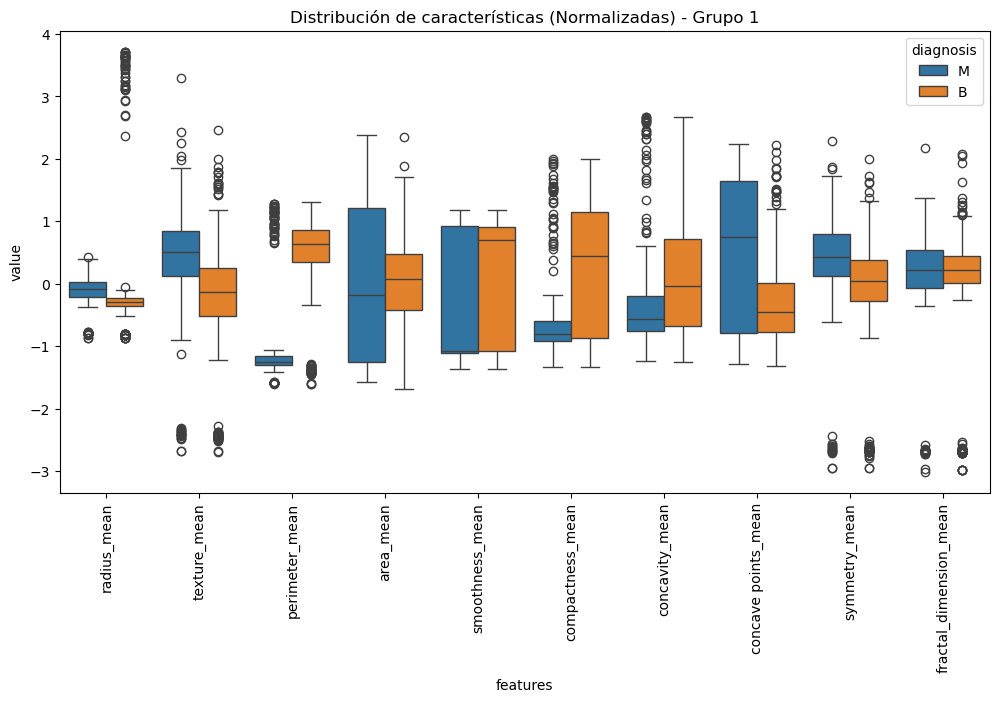

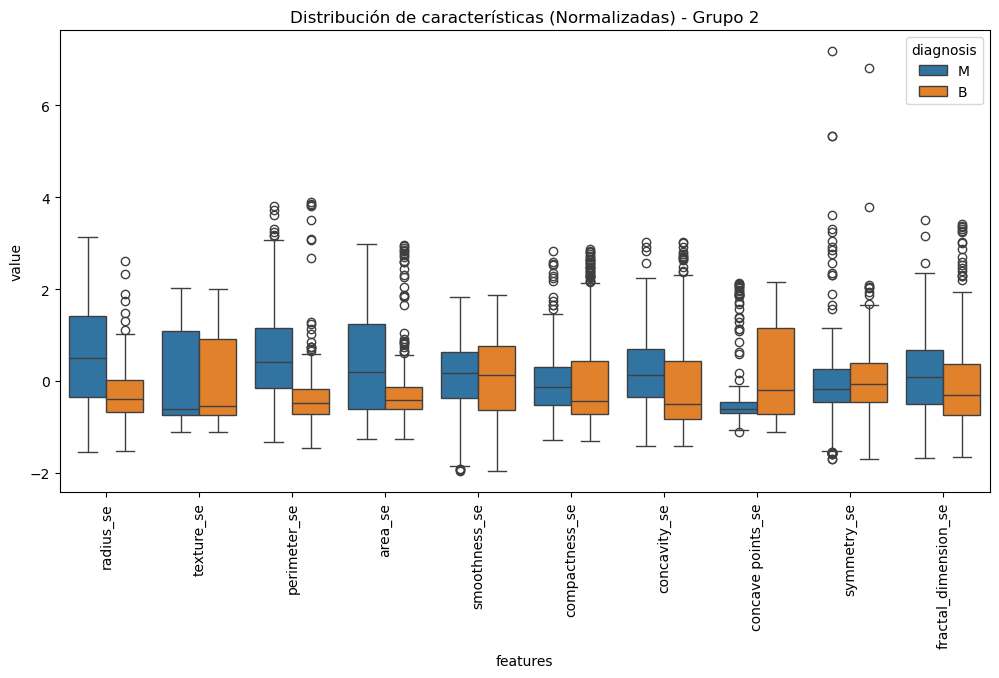

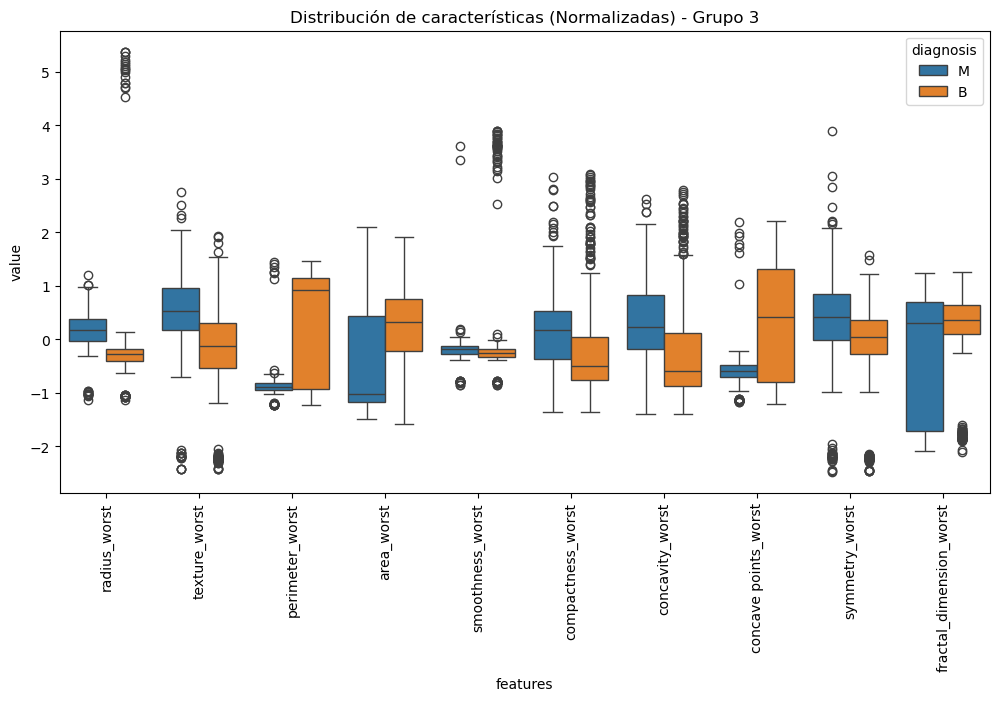

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop the 'id' column if it is still present
df = df.drop(columns=["id"], errors="ignore")

# Normalize the data (Standardization)
df_normalized = (df.iloc[:, 1:] - df.iloc[:, 1:].mean()) / df.iloc[:, 1:].std()

# Add the diagnosis column back to the normalized DataFrame
df_normalized["diagnosis"] = df["diagnosis"]

# Transform all features into long format
df_long = pd.melt(df_normalized, id_vars="diagnosis", var_name="features", value_name="value")

# List of explanatory variables divided into groups of 10
feature_groups = [
    ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
     'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
    
    ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
     'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'],
    
    ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
     'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
]

# Generate box plots by feature groups
for idx, feature_set in enumerate(feature_groups):
    df_subset = df_long[df_long["features"].isin(feature_set)]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="features", y="value", hue="diagnosis", data=df_subset)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of features (Standardized) - Group {idx+1}")
    plt.show()


Although the cash diagram is perhaps the most used and in my opinion the most useful when interpreting this dataset, we can also show another form of visualization. For example, the histograms that can allow us to see more precisely some statistical properties than in the cash diagram is not possible, for example, knowing that there is asymmetric distribution that form has such distribution.

We know for the previous Plot box that those variables that have a more acuity asymmetric distribution are as follows:

* Of the first 10 stograms smoothness_mean, concavity_mean
* Of the second 10 Histograms Texture_se, Concavity_se and Concave Points_se
* Of the third 10 Perimeter_Wortst Histograms, Area_Wortst and Fractal_Dimension_WortLooking at the histograms of 1 we see that the first two cases smoothness_mean and concavity_mean is due to a very high concentration of between values ​​0 and 2000 which causes asymmetry. \
In the histograms of 2, Texture_se and Concave Points_ the same thing happens to it, that is, they have a high concentration between the values ​​0 and 2000. Instead, concavity_ is still asymmetric but without having all the values ​​concentrated between 0 and 2000 but in 0 and 5000. \
In the same way it occurs with Perimeter_Wors, fractal_dimension_wors. On the other hand, the characteristic area_worst also has asymmetric distribution, but occurs with much more environment in Malignant than Benign. This may be interesting to consider the future for the different models.

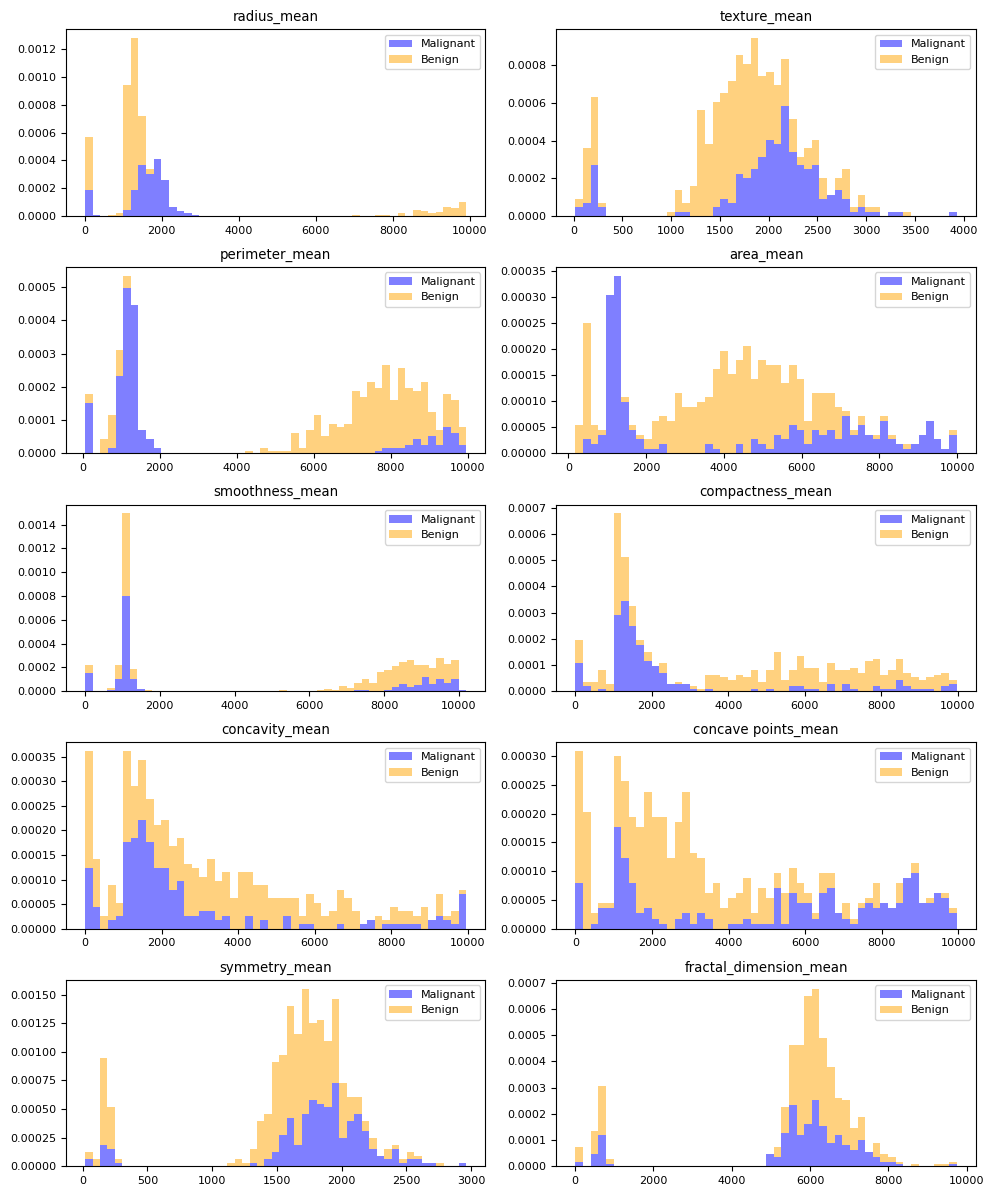

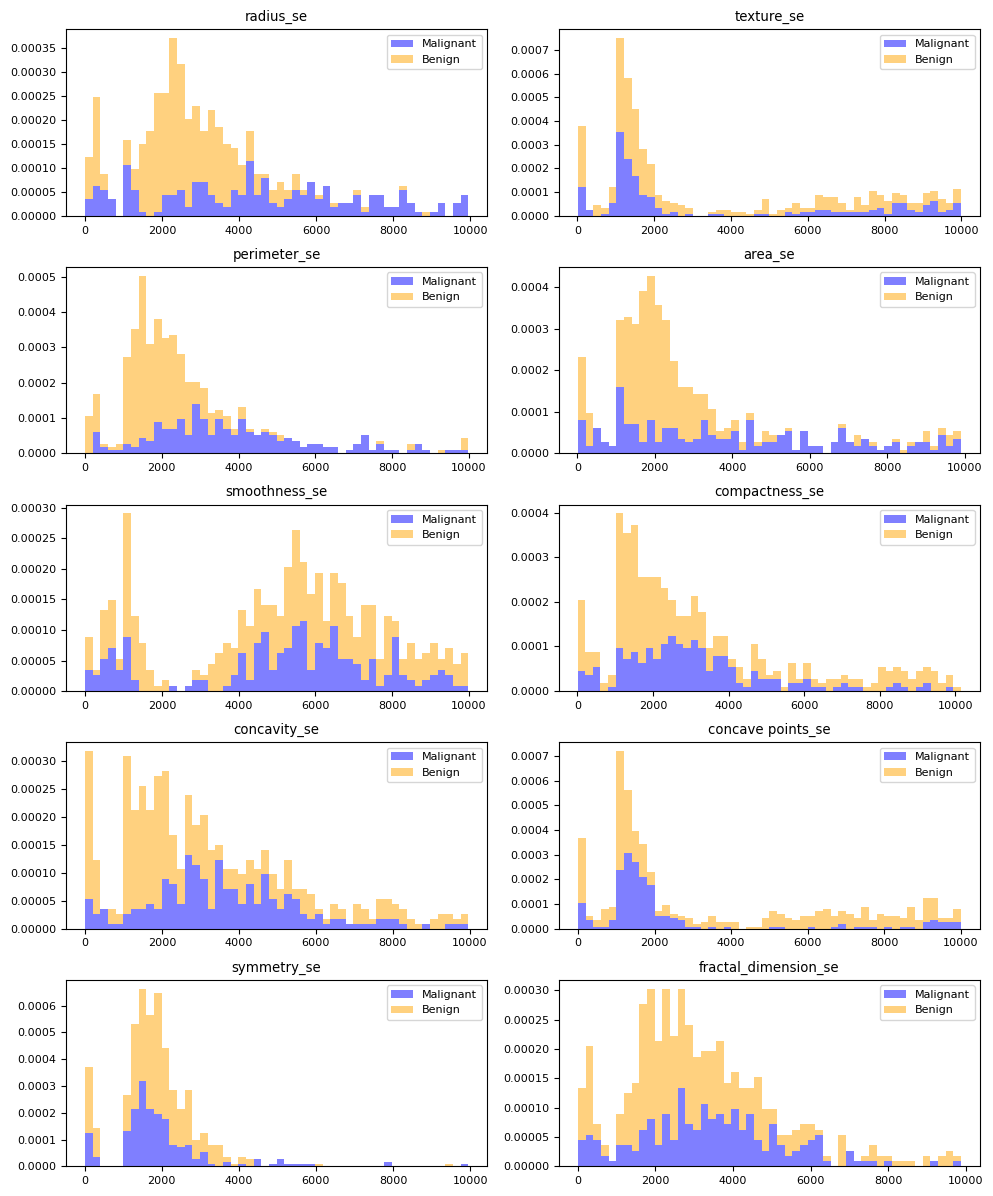

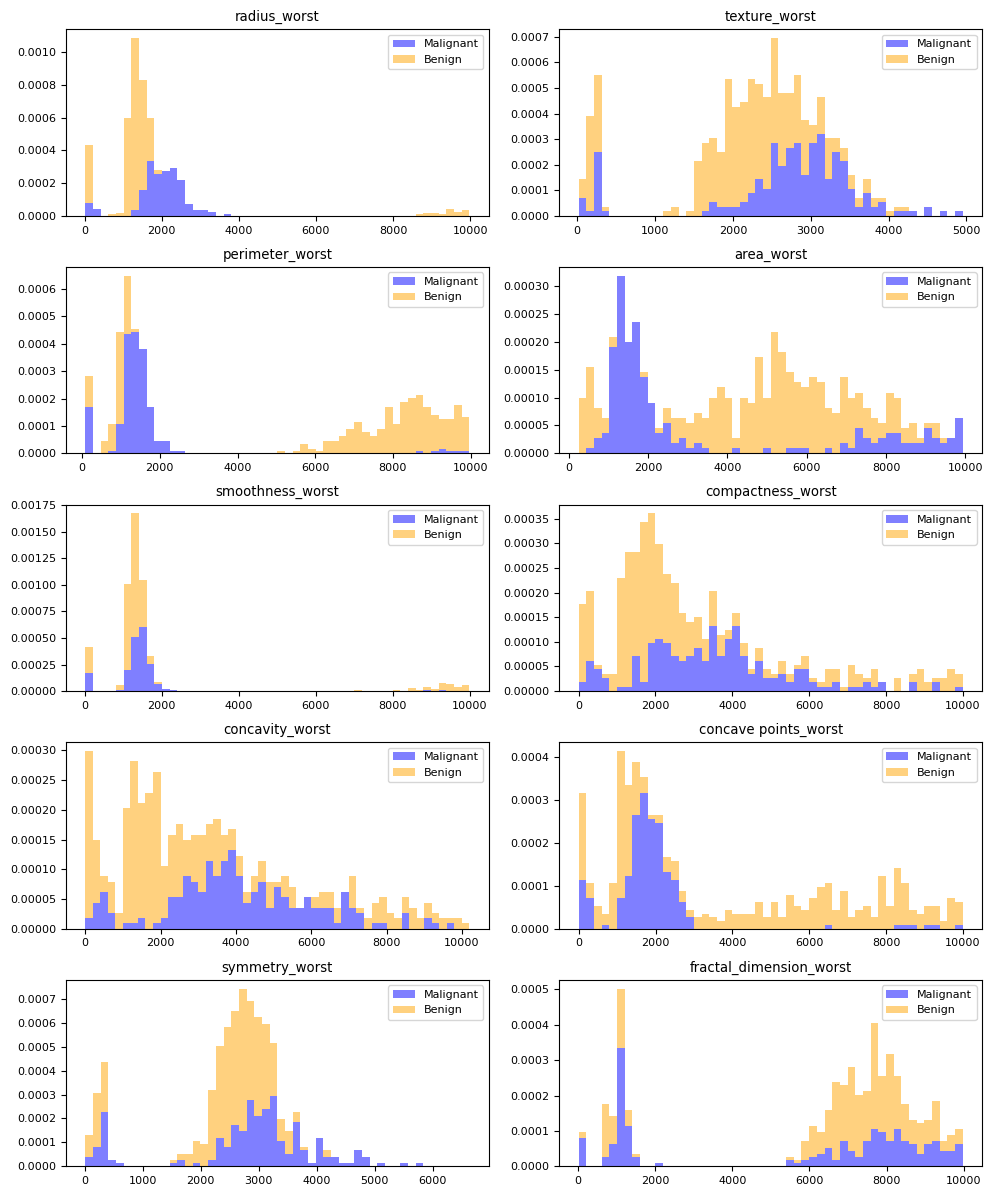

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List of all explanatory variables to plot
features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Create subsets of the DataFrame by diagnosis
dfM = df[df["diagnosis"] == "M"]  # Malignant tumors
dfB = df[df["diagnosis"] == "B"]  # Benign tumors

# Divide the features into groups of 10
group_size = 10
for i in range(0, len(features), group_size):
    feature_subset = features[i:i+group_size]  # Take a group of 10 features

    plt.rcParams.update({'font.size': 8})
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))  # 5 rows, 2 columns
    axes = axes.ravel()  # Flatten the array of axes for easier iteration

    for idx, ax in enumerate(axes):
        if idx < len(feature_subset):  # Ensure we don’t exceed the number of features
            feature = feature_subset[idx]

            # Define the bin width dynamically based on the range of values
            binwidth = (df[feature].max() - df[feature].min()) / 50

            # Create normalized stacked histograms
            ax.hist(
                [dfM[feature], dfB[feature]],
                bins=np.arange(df[feature].min(), df[feature].max() + binwidth, binwidth),
                alpha=0.5, stacked=True, density=True,  # Normalized with "density=True"
                label=['Malignant', 'Benign'], color=['blue', 'orange']
            )

            ax.legend(loc='upper right')
            ax.set_title(feature)

    # Adjust spacing between plots
    plt.tight_layout()
    plt.show()


In the previous histogram we have graphic separating the values ​​of the variables based on whether in its row is the evil value or benign in the diagnostic column. In this new histogram we will represent it together and draw the density function that best fits the data. We do this to demonstrate what is clearly seen in the previous histogram, which is the fact that almost all variables have asymmetric distribution. \
The only ones that could be considered with Gaussian distribution would be texture_mean and texture_wors.

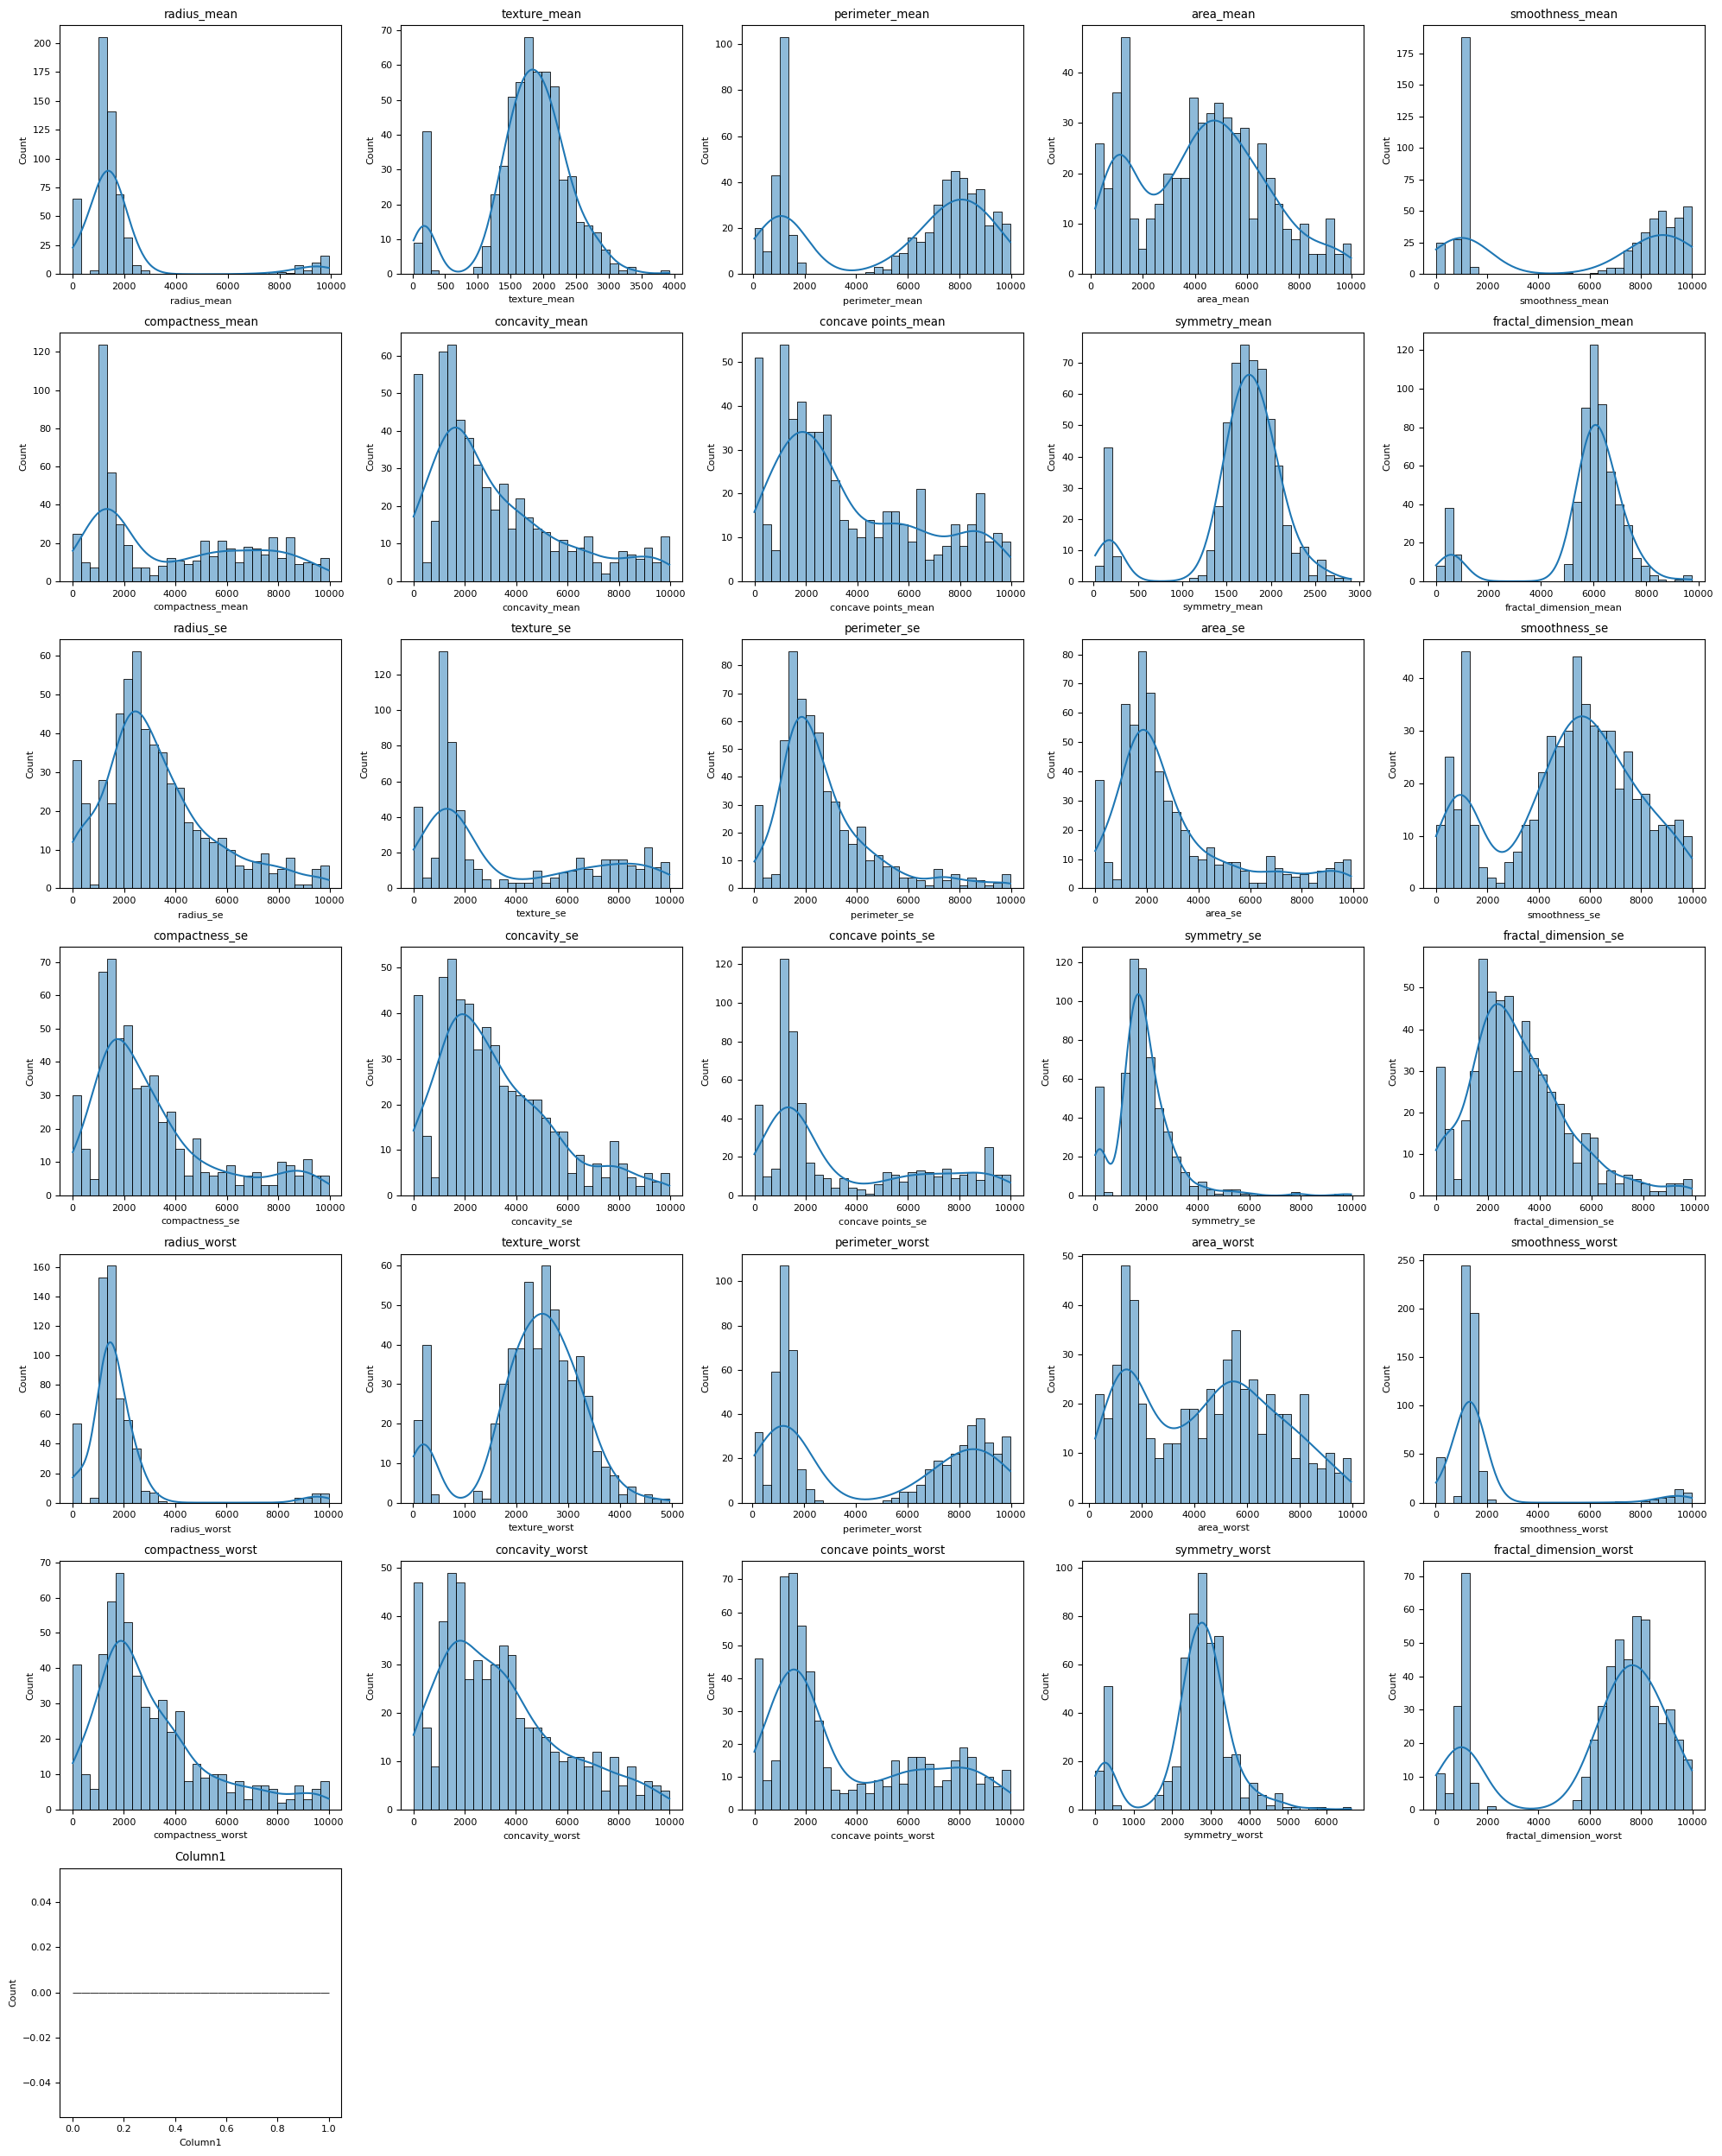

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of explanatory variables (excluding 'diagnosis')
features = [col for col in df.columns if col != "diagnosis"]

# Plot histograms with KDE for each variable
plt.figure(figsize=(20, 25))
for i, feature in enumerate(features, 1):
    plt.subplot(7, 5, i)  # 7 rows × 5 columns = 35 slots
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()


## 2 Quantitative analysis of the problem

### 2.1 internal evaluation metrics

Internal evaluation metrics are used to evaluate the quality of clustering without using true labels, based only on the data and results of clustering such as centroids, the concentration of data within each cluster, compaction or remoteness between the generated clusters, separation. They are different from external metrics, which are compared to true labels (these do not work).

#### 2.1.1 Silhouette Score

The value of the silhouette is a measure that is responsible for measuring how similar it is a fact to its own cluster compared to other clusters to which it does not belong.
The silhouette ranges from -1 to +1, where a high value indicates that the object is well paired with its own cluster and badly matched with the neighboring clusters.

$a(i)=\frac{1}{|C_{I} -1|} \sum_{j\in C_{I}, i\neq j } d(i,j)$

$ b(i)=\min_{k\neq i}\frac{1}{|C_{k}|}\sum_{j\in C_{k}} d(i,j)$

$s(i)=\frac{b(i)-a(i}{\max\{ a(i), b(i) \} }, \quad \text{si} \quad |C_{I}>1 | $

Where $a(i)$ measure how much the resemblance is $i$ to its own group, $b(i)$ how much of resemblants is $i$ to the neighboring clusters and $s(i)$ measures how much similar are the elements of the same cluster, being able to take values ​​between -1 and 1, that is,$s(i)\in [-1, 1]$

Algorithms where where it is metric gives better evaluation.

This metric works best for K-Means and Gaussian Mixture algorithms (with a hard assignment). The reason is because these algorithms the clusters they generate are separated and convex, that is, any elliptical form. This means that if we focus on the bordering points of a cluster, these will be far from other cluster which implies that the value of $b(i)$ will be very low while $a(i)$ will be high. Therefore, the measure that interests us, $s(i)$, will be close to 1.Another reason is that K-Means uses in its cost function the euclidean distance as well as Silhouette Score. For the other algorithm, Gaussian Mixture, it is important that their assignment be hard since otherwise elliptically clusters could be overlapped.


Although the euclidean distance is used by default. This evaluation measure allows us to use other metrics, L1, L2, Mahattan, Hamming, Ect. 

Another important aspect is what data the metric works better or worse. The best are those of low dimension, well -separated clusters, convex and uniform density, on the other hand, the worst are irregularly non -uniform density.

### 2.1.2 Calinski_harabasz_score

In this internal metric exactly the same thing as with the previous one, we evaluate two things simultaneously. The dispersion between Cluster, how separate are between them and the similarity between the data of the same cluster, how compact are. \
In this case, these mathematical expressions are used to measure both situations.

The expressions are the following being$n$ the set of points, $k$ the number of clusters $\{C_{1}, \ldots, C_{k}\}$, $c_i$ is the centroid of $C_i$y@@

$ CH=\frac{ BCSS/(k-1) }{ WCSS/( n-k ) } $

$ BCSS=\sum_{i=1}^{k}n_{i} || c_i - c ||^2 $

$ WCSS=\sum_{i=1}^{k}\sum_{x\in C_{i}} || x - c_i ||^2 $ Where BCSS is the sum of squares between clusters (Between-Cluster Dispersion) so it measures the dispersion between Cluster, WCSS is the sum of squares inside the cluster (within-cluster dispersion) that measures the similarity within the cluster and CH which is the ratio between them. The latter measures how much similar are the data to your own cluster compared to the rest of clusters. \
The values ​​that CH can take are 0 and $\infty$, that is, $CH\in[0,\infty)$. The greater the value, the better the grouping. Therefore, we look for high values ​​for BCSS and low values ​​for WCSS.This metric works well with the same algorithms as the previous metric explained, K-Means, Gaussian Mixture (hard case) and also agglometering clustering. The reason is to better evaluate algorithms that generate separate and convex clusters. The algortimos commented above do this precisely. \
The third algorithm, agglometering clustering, depending on what value we give to the Linkage hyperparameter will give the Calinski Harabasz metric or bad results. If we select linkage = ward, then the intra-cluster variance is minimized and will give good results, however, for the rest of the average, complete or others will give bad results.


In summary, the data for which this metric works are convex and separate clusters.

As we have already been able to realize, there are many similarities between Silhouette Score and Calinski-Harabasz. So we ask ourselves now what their differences are. For this we will make a contrast in some of its characteristics.The most important are its mathematical expressions. Silhouette works with average distances between points and ch with the variance between and inside cluster. \
This leads us to Silhouette to be able to detect the clusters that are very close to each other since it measures directly in its formula, however, CH how it works with variance works well with large clusters and that its data is scattered. \
Another thing to keep in mind is size. As Silhouette normalizes each point, it is not relevant to him size, but for CH since this metric does not normalize and therefore has sensitivity to the size of the clusters evaluated


For Vero in a more schematic way, we show a small table that summarizes these differences| Name | Silhouette Score | Calinski-Harabasz Index (Chi) |
| ---------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| ** Definition ** | Based on medium distance between points | Based on variance between and within Clusters |
| ** Acting ** | Local (point to point) | Global (Complete Groups) |
| ** RANGE ** | [-1, 1] | [0, ∞) |
| ** Standardization ** | Normalize for each point | It does not normalize, it is sensitive to the size of clusters |
| ** Detection of forms ** | Detects very close clusters | Detect and overestimate large but scattered clusters |

### 2.1.3 Davies_Bouldin_Score

This metric penalizes the similarity between clusters. Evaluate the average of the worst relations between stops of clusters, where each relationship measures how much two clusters are over taking into account its internal dispersion and the distance between Centralides. Let's see how it does. \

We start giving its mathematical definction. It is not direct as the previous ones so you have to define a pair of terms until you reach the DBI metric. \
Given a set of data grouped in K clusters $C_1, C_2, \ldots, C_k$ with centroids $c_1, \ldots, c_k$ we have that the dispersion of a cluster i is \
$S_i =\frac{1}{|C_i|}\sum_{x\in C_i} || x - c_i  ||$\
It measures how dispersed cluster I being the distance of the points to the centroid

On the other hand we have that the separation between clusters I and J is \
$M_{ij}=|| c_i - c_j ||$ and the index between clusters I and J is \
$R_{ij}=\frac{S_i + S_j }{M_{ij}}$\
The greater it is $R_{ij}$ , worse is the relative separation between those two clusters

For each cluster I, the worst case is taken \
$R_{i}=\max_{j\neq i}R_{ij}$

The expression of the metric is then \
$DBI=\frac{1}{k}\sum_{i=1}^{k}R_i$


Seeing its mathematical expression and taking into account that it is a penalty, we can say that penalty when there is a high internal dispersion $S_i$, a short distance between clusters $M_{ij}$ (bass) and that it is only considered the worst case for each cluster due to the term $R_{i}$
In short, it is a metric that penalizes clusters overlapping or non -compact.Now we go for a question that we have asked each other before. What are the dataset that work best with this metric. \
For example, Chi and Silhouette that use the Euclidean distance give good results with data that form clusters with convex form, but DBI penalizes overlapping, does not form. That is, DBI can give good results if the centroids are well separated and the dispersions are not high although the shape of the clusters are not convex. \
In addition, although it is not relevant to practice its computational cost is low.

We put a summary table of the metrics

| Metric | Function at `sklearn` | Best value |
| ------- | ---------------------- | ------------ |
| ** Silhouette Score ** | `sklearn.metrics.silhouette_score()` | Higher (maximum = 1) |
| ** calinski-harabasz index ** | `sklearn.metrics.calinski_harabasz_score()` | Higher |
| ** Davies-Bouldin Index ** | `sklearn.metrics.davies_bouldin_score()` | Lower |

### 2.2 K-Means algorithm

First of all, we eliminate the columns diagnosed because it is the Target and Colum1 variable that is empty and does not provide anything.

In [8]:
list02 = [ 'diagnosis', 'Column1']
x = df.drop(list02,axis = 1 )  # Elimina las variables de la lista 

In [9]:
#Número de filas y columnas
num_filas, num_columnas = df.shape

# Mostrar filas y columnas
print(f"El dataset tiene {num_filas} filas y {num_columnas} columnas.")

El dataset tiene 569 filas y 32 columnas.


Mathematically K-Measn works as follows. Given a set of points $ X = \{x_1, x_2, \ldots, x_n\} \subset \mathbb{R}^d $. K-Means seeks to partition the points at $k$ clusters 
$C_1, C_2, \ldots, C_k$ such that it is minimized

$$
\underset{C_1,\ldots,C_k}{\arg\min} 
\sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

where@
and the distance used is the euclidean standard.

Interpretation of the results:

We remember that they indicate the values ​​of the metric dystitnas: \
Silhouette [-1, 1]: The better the better. \
Calinski-harabasz ch: $[0, \infty)$. The better the better. \
Davies-Bouldin Index dbi: $[0,\infty)$. The better the better


We see each internal metric separately and then make a global analysis.* 1* Silhouette Score \
We see how the best value is for the case $k=2$ and from there it decreases monotonously. This can be caused for clusters to become smaller and closest, which reduces separation between them, lowering their score. In addition, as the data of the DatasetCancer.CSV data set, the dominant variables influence the geometry of the clusters, making it more difficult to find convex forms and this precisely worsen the Silhouette Score.* 2* calinski-harabasz score (CH) \
We see how it decreases monotonously with the increase in values ​​of k. This can be caused to Cho measuring the relationship between inter and intra-cluster variance. \
By increasing the number of clusters (k) the dispersion between clusters is reduced, so they are and in turn should increase internal density in cluster, but as CH it reduces its value it is obvious that the second situation does not occur. That is, we have more clusters although within them the density, which indicates that increasing the cluster number to some extent is not better.* 3* Davies-Boudin Index \
This is perhaps the most difficult to interpret since there is no monotony or decreasing or growing, but both. It begins being growing and then decreasing. \
A possible explanation is that by increasing K, as we have said before the clusters are more compact, even if they are closer to each other. Therefore, the index decreases. Each cluster is more isolated with respect to its closest neighbors.* 4* global analysis. \
Look at the metrics together after using the K-Means algorithm on the non-climbing data, we can say that the Silhouette Score metric reaches its maximum value in$𝑘=2$, which suggests that the natural structure of the data set is dominated by two large groups (consisting of the binary nature of the Target diagnosis variable).
As the number of clusters increases, both Silhouette and Calinski-Harabasz decrease, indicating a reduction in internal density or compactness and the separation between clusters. \
However, Davies-Bouldin Index has a light improvement with $k>6$, indicating an improvement in the internal compactness of the clusters. This behavior may be due to the use of non -climbing data, where the most numerical variables have a greater weight in the definition of the clusters.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Usamos los datos, sin escalar y sin eliminar outliers. Raw=Crudo
X_raw = x.copy()

# Repetimos el bucle para calcular las métricas sin escalar
raw_results = {
    "n_clusters": [],
    "silhouette_score": [],
    "calinski_harabasz_score": [],
    "davies_bouldin_score": []
}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_raw)

    sil_score = silhouette_score(X_raw, labels)
    ch_score = calinski_harabasz_score(X_raw, labels)
    db_score = davies_bouldin_score(X_raw, labels)

    raw_results["n_clusters"].append(k)
    raw_results["silhouette_score"].append(sil_score)
    raw_results["calinski_harabasz_score"].append(ch_score)
    raw_results["davies_bouldin_score"].append(db_score)

raw_results_df = pd.DataFrame(raw_results)

print(raw_results_df)

c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Ricardo\anaconda3\envs\AAII\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ricardo\anaconda3\envs\AAII\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Ricardo\anaconda3\envs\AAII\Lib\subprocess.py

   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.139109                90.048213              2.436702
1           3          0.120542                62.682132              2.615272
2           4          0.098021                55.448334              2.642940
3           5          0.090450                49.271755              2.700058
4           6          0.094568                44.028835              2.644120
5           7          0.080751                38.937546              2.745799
6           8          0.088063                38.784163              2.550244
7           9          0.080494                35.730307              2.489789
8          10          0.090149                34.723875              2.341687


c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

### 2.3 Jewish clustering algorithm

In the slides of the campus it is proposed as an agglomeraveclustering option. Therefore, we use this option

If we look at the exit we observe that the tendency of the values ​​of the metrics is similar to the previous case K-Means and are also approximately in the same range of values. \
For example, in K-Means the metric Silhouette_Score, Calinski_harabasz_score are (0.090149, 0.139109) and (34.723875, 90.048213) \ \ \ \ \ \
While in agglomerants clustering (0.080647, 0.128226) and (31.865785, 78.576518). \
The data of the metrics tell us that agglomerant clustering has a behavior similar to the previous case and for the same reasons set forth above as we vary the cluster numbers (K).Something to highlight is the fact that the Silhouette and Davies-Bouldin metrics are local and Chi is global. This makes Chi more suitable for a hierarchical algorithm that generates clusters through successive junctions based on compact criteria. But this hypothesis that would be valid in general terms is not fulfilled for this case specifically. \
We see how the best value of Chi is 78,576518 while Chi in K-Means is 90.048213 (more better).

What can be the explanation that this occurs. Most likely it is because the Target Diagnosis variable is dichotomous and this limits the potential of this metric. If I had a Target variable with more classes we might see better values.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Use the data as is, without scaling
X_raw = x.copy()

# Initialize results
hierarchical_results = {
    "n_clusters": [],
    "silhouette_score": [],
    "calinski_harabasz_score": [],
    "davies_bouldin_score": []
}

# Loop over number of clusters
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_raw)

    sil_score = silhouette_score(X_raw, labels)
    ch_score = calinski_harabasz_score(X_raw, labels)
    db_score = davies_bouldin_score(X_raw, labels)

    hierarchical_results["n_clusters"].append(k)
    hierarchical_results["silhouette_score"].append(sil_score)
    hierarchical_results["calinski_harabasz_score"].append(ch_score)
    hierarchical_results["davies_bouldin_score"].append(db_score)

# Display results
hierarchical_results_df = pd.DataFrame(hierarchical_results)
print(hierarchical_results_df)


   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.128226                78.576518              2.425110
1           3          0.093092                59.330046              2.613709
2           4          0.097281                50.917250              2.750931
3           5          0.093295                45.680443              2.753343
4           6          0.093235                41.435045              2.572880
5           7          0.094750                38.582672              2.569234
6           8          0.091706                36.626812              2.496303
7           9          0.082984                33.997379              2.562540
8          10          0.080647                31.865785              2.432026


### 2.4 Gaussian mix algorithm (Gaussianmixture)

This algorithm to differences from the previous two is a probabilist model that works with Gaussian distributions, which allows soft assignments to be done, that is, a fact can belong to several clusters. This is important when evaluating the results of internal metrics.Again, we see again that for $k=2$ we have the best value for the Silhouette metric, but slightly lower than that obtained in K-Means. This is because when we use GMM there is a overlap between clusters. \
The Davies-Bouldin index shows a significant improvement in K = 10, suggesting that the internal density of clusters increases with more Gaussian mixtures despite losing separation capacity. (To more clusters, less separate).
This result is likelihood since GMM can adapt to diverse forms and densities, but it tends to generate more overlapping clusters


The Calinski-Harabasz index descends constantly, reflecting a progressive loss of inter-cluster separation as it increases 
k

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Use the data as is (without scaling, same as previous cases)
X_raw = x.copy()

# Initialize results
gmm_results = {
    "n_clusters": [],
    "silhouette_score": [],
    "calinski_harabasz_score": [],
    "davies_bouldin_score": []
}

# Loop over number of clusters
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_raw)
    labels = gmm.predict(X_raw)

    sil_score = silhouette_score(X_raw, labels)
    ch_score = calinski_harabasz_score(X_raw, labels)
    db_score = davies_bouldin_score(X_raw, labels)

    gmm_results["n_clusters"].append(k)
    gmm_results["silhouette_score"].append(sil_score)
    gmm_results["calinski_harabasz_score"].append(ch_score)
    gmm_results["davies_bouldin_score"].append(db_score)

# Display results
gmm_results_df = pd.DataFrame(gmm_results)
print(gmm_results_df)


c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.114422                73.322232              2.737061
1           3          0.084746                54.669601              3.051917
2           4          0.092312                52.058688              2.720108
3           5          0.088722                45.943937              2.924046
4           6          0.093888                43.104725              2.660054
5           7          0.080490                37.758044              2.837368
6           8          0.085596                38.274225              2.575643
7           9          0.078725                35.440582              2.509349
8          10          0.089698                34.564880              2.351346


c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## 3 Qualitative analysis of the problem

In this section it is a more thorough investigation of the algorithms used in the previous section, whether modifiating its hyperparameters, precoccalizing the data or visualizing them to achieve a better results in the metrics.

### 3.1 Modification K-Means Algorithm

## Hyperparameter Tuning in Clustering Algorithms

In this section, we will focus on varying the hyperparameters of clustering algorithms, since they were not modified before, in order to check whether there is an improvement in the evaluated metrics. The idea is to use the default K-Means function as a reference and compare it with other K-Means runs where some hyperparameters have been modified.

1. Hyperparameter **max_iter**

The first hyperparameter we modify is `max_iter`, whose default value is `max_iter=300`, and we change it to `max_iter=600`. This hyperparameter indicates the maximum number of iterations performed, in this case, by the Lloyd algorithm.  

Comparing the output of `kmeans_01_default` and `kmeans_02_maxiter600`, we see that we obtained the same result for all possible combinations of the value *k* (clusters) with the three metrics. We also tested values below 300, such as 10, and once again obtained the same results.  

The interpretation is clear: the algorithm converges very quickly, so increasing the number of iterations has no influence on the final result. This is due to the fact that the dataset we are working with has the target variable `diagnosis` as dichotomous (M or B). Therefore, it is easy for the K-Means algorithm to reach the optimal clusters.  

Let’s see if other hyperparameters lead to differences.



2. Hyperparameter **tol**

This hyperparameter defines the convergence criterion. If the shift of the centroids between iterations is smaller than `tol`, the process stops. According to the sklearn documentation, it uses the Frobenius norm. Let’s see mathematically how this norm is used and where the `tol` term appears.  

The measure of how much the centroids have changed between iterations $C^{(t)}$ and $C^{(t-1)}$ is evaluated with the Frobenius norm, denoted as:

$$ || C^{(t)} - C^{(t-1)}  ||_{F} $$

Where $C^{(t)} \in \mathbb{R}^{k\times d}$ is the centroid matrix at iteration *t*, with *k* clusters and *d* dimensions. Each row is a centroid and the columns are its coordinates. The Frobenius norm is defined as:

$$ ||A ||_{F}=\sqrt{\sum_{i=1}^{k}\sum_{j=1}^{d} |a_{ij}|^2  } $$

In the algorithm, it is checked whether this centroid change falls below the required tolerance `tol`:

$$ \frac{ || C^{(t)} - C^{( t-1 ) }  ||_{F} }{ || C^{(t-1)} ||_{F}  } < \textbf{tol} $$

Thus, the interpretation of this inequality is that if the distance between centroids of two consecutive iterations is such that the left-hand side is greater than the right-hand side, the iteration continues. When the left-hand side is smaller than the right-hand side, the inequality is satisfied and the process stops at that iteration.  

By default, `tol` in K-Means is `1e-4`. We change it to `1e-6` and find that this new value does not affect the results. In fact, we obtain the same as when modifying the previous hyperparameter.  

**Interpretation:** Even when demanding greater closeness between centroids, the convergence of the algorithm is the same. This means that the centroids barely change position in the *d*-dimensional space where we are working. This reinforces the idea that with the `datasetCancer` data it will be difficult to improve the algorithms, since the task is essentially classifying data into two classes: M and B.



3. Hyperparameter **algorithm**

As another important hyperparameter, we change `algorithm` from *lloyd* to *elkan*, but we still obtain the same result. It is therefore clear that, with the data as they are, this algorithm cannot be improved further.  

A possible option, which we will address later, is data preprocessing: removing outliers and then modifying the hyperparameters again.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

X_raw = x.copy()

# Define the different KMeans configurations
# "kmeans_01_default"   Default parameters
# "kmeans_02_maxiter600" Same but increasing the number of iterations. Default --> 300, Now --> 600
# "kmeans_02_maxiter10"  Same but decreasing the number of iterations. Now --> 10
# "kmeans_03_tol"       Change the tolerance parameter from tol=1e-4 (default) to tol=1e-6 (uses Frobenius norm)
# "kmeans_01_algorithm" Change the type of algorithm
# "kmeans_04_ninit20"   Increase the number of initializations from default (10) to 20
# "kmeans_05_lloyd"     Explicitly use the Lloyd algorithm
# You can add more configurations here
configurations = {
    "kmeans_01_default": {"init": "k-means++", "random_state": 42}, 
    "kmeans_02_maxiter600": {"init": "k-means++", "max_iter": 600, "random_state": 42},
    "kmeans_02_maxiter10": {"init": "k-means++", "max_iter": 10, "random_state": 42},
    "kmeans_03_tol": {"init": "k-means++", "tol": 1e-6, "random_state": 42},
    "kmeans_01_algorithm": {"init": "k-means++", "random_state": 42, "algorithm": "elkan"}, 
    "kmeans_04_ninit20": {"init": "k-means++", "n_init": 20, "random_state": 42},
    "kmeans_05_lloyd": {"init": "k-means++", "algorithm": "lloyd", "random_state": 42},
}

# Dictionary to store results for each configuration
all_results = {}

for config_name, params in configurations.items():
    results = {
        "n_clusters": [],
        "silhouette_score": [],
        "calinski_harabasz_score": [],
        "davies_bouldin_score": []
    }

    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **params)
        labels = kmeans.fit_predict(X_raw)

        sil = silhouette_score(X_raw, labels)
        ch = calinski_harabasz_score(X_raw, labels)
        db = davies_bouldin_score(X_raw, labels)

        results["n_clusters"].append(k)
        results["silhouette_score"].append(sil)
        results["calinski_harabasz_score"].append(ch)
        results["davies_bouldin_score"].append(db)

    # Save results in the main dictionary
    all_results[config_name] = pd.DataFrame(results)

# Example: display results of specific configurations
print(all_results["kmeans_01_default"])
print("----------------- kmeans_02_maxiter600 -------------")
print(all_results["kmeans_02_maxiter600"])
print("----------------- kmeans_03_tol -------------")
print(all_results["kmeans_03_tol"])


c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.139109                90.048213              2.436702
1           3          0.120542                62.682132              2.615272
2           4          0.098021                55.448334              2.642940
3           5          0.090450                49.271755              2.700058
4           6          0.094568                44.028835              2.644120
5           7          0.080751                38.937546              2.745799
6           8          0.088063                38.784163              2.550244
7           9          0.080494                35.730307              2.489789
8          10          0.090149                34.723875              2.341687
----------------- kmeans_02_maxiter600 -------------
   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.139109                90.048213              2.436702

c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

In [ ]:
print("----------------- kmeans_03_tol -------------")
print(all_results["kmeans_03_tol"])
print("----------------- kmeans_02_maxiter10 -------------")
print(all_results["kmeans_02_maxiter10"])


----------------- kmeans_03_tol -------------
   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.139109                90.048213              2.436702
1           3          0.120542                62.682132              2.615272
2           4          0.098021                55.448334              2.642940
3           5          0.090450                49.271755              2.700058
4           6          0.094568                44.028835              2.644120
5           7          0.080751                38.937546              2.745799
6           8          0.088063                38.784163              2.550244
7           9          0.080494                35.730307              2.489789
8          10          0.090149                34.723875              2.341687
----------------- kmeans_02_maxiter10 -------------
   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.139109  

We show algorithm change

In [ ]:
print("----------------- kmeans_01_algorithm -------------")
print(all_results["kmeans_01_algorithm"])

----------------- kmeans_01_algorithm -------------
   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.139109                90.048213              2.436702
1           3          0.120542                62.682132              2.615272
2           4          0.098021                55.448334              2.642940
3           5          0.090450                49.271755              2.700058
4           6          0.094568                44.028835              2.644120
5           7          0.080751                38.937546              2.745799
6           8          0.088063                38.784163              2.550244
7           9          0.080494                35.730307              2.489789
8          10          0.090149                34.723875              2.341687


### 3.2 MODIFICATION ALGORITMO AGGLOMERTIVECLUSTERING

Hyperparameter **Linkage** and **Metric** \
Since the first hyperparameter is conditioned by the second, we analyze both together. \
The most used combination of all and that we have already tried before is the default given by the agglometering chlometering class (): linkage = 'ward' and metric = 'euclidean'. \
 This strolling fuses in each step the clusters that minimize the sum of squares within the created cluster (variance), so it produces compact and separated cluster as we said in section 2. This makes a good candidate for the metric Silhouette_Score and Calinski_harabasz_score since they evaluate the compaction and separation well.Case **Linkage = 'average'** and **Metric = 'Manhattan'** \
We see that the results have been obtained with this combination is not better in general. This may be because our data has not been manipulated and therefore are not scaled. This affects the Mahattan metric more than Euclidean. \
The miotive is easy to see. If we compare their mathematical expressions being the first Manhattan and Second Euclidean
    $$ d_{manhattan}(x,y)= \sum_{i=1}^{n}| x_i - y_i | \quad d_{euclidean}(x,y)= \sqrt{ \sum_{i=1}^{n}(x_i - y_i)^2 }  $$
We see that in the first the data that are remote than in the second affect more since the quadrado root ($\sqrt{}$) reduces the value.

Case **Linkage = 'Complete** and **Metric = 'Cosine'** \
This is where the metrics give worse result, again for the same reason set forth before. The data are not normalizedHyperparameter ** Connectivity ** \
Use a connectivity matrix (neighborhood graph) that allows you to control the structure of the clusters grouping,
This is useful if you have spatial data or a topologically defined network structure. The most classic examples would be images, networks and temporary series. In our case, we are dealing with a dataset based on the images of the breasts of patients with or without breast cancers. In spite of many variables they have to do with geometric such as the radio or perimeter, other features not, which makes this hyperparameter not so powerful for our case.This hyperparameter admits as an array an array that is mathematically a matrix of connections between data, that is, a graph. Before trying to define the argument we will use visualizations in case it is possible or not to use. (I already advanced no)


Valid combinations examples

In [ ]:
# Ward with euclidean (valid) - FIRST OPTION
AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

# Average with manhattan (valid)
AgglomerativeClustering(n_clusters=3, linkage='average', metric='manhattan')

# Complete with cosine (valid)
AgglomerativeClustering(n_clusters=3, linkage='complete', metric='cosine')

# Single with precomputed (valid if you pass a distance matrix)
AgglomerativeClustering(n_clusters=3, linkage='single', metric='precomputed')


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

X_raw = x.copy()

# Define the AgglomerativeClustering configurations
# linkage: ward --> only works with euclidean distance
# linkage: average, complete, single can use different metrics

# AgglomerativeClustering(n_clusters=3, linkage='average', metric='manhattan')
# AgglomerativeClustering(n_clusters=3, linkage='complete', metric='cosine')
# AgglomerativeClustering_connectivity01 
# AgglomerativeClustering_connectivity02 
configurations = {
    "AgglomerativeClustering_default": {"linkage": "ward", "metric": "euclidean"},
    "AgglomerativeClustering_average": {"linkage": "average", "metric": "manhattan"},
    "AgglomerativeClustering_complete": {"linkage": "complete", "metric": "cosine"},
    # You can add more configurations here
}

# Dictionary to store results for each configuration
all_results = {}

for config_name, params in configurations.items():
    results = {
        "n_clusters": [],
        "silhouette_score": [],
        "calinski_harabasz_score": [],
        "davies_bouldin_score": []
    }

    for k in range(2, 11):
        model = AgglomerativeClustering(n_clusters=k, **params)
        labels = model.fit_predict(X_raw)

        sil = silhouette_score(X_raw, labels)
        ch = calinski_harabasz_score(X_raw, labels)
        db = davies_bouldin_score(X_raw, labels)

        results["n_clusters"].append(k)
        results["silhouette_score"].append(sil)
        results["calinski_harabasz_score"].append(ch)
        results["davies_bouldin_score"].append(db)

    # Save results in the main dictionary
    all_results[config_name] = pd.DataFrame(results)

# Example: display results of specific configurations
print("----------------- AgglomerativeClustering_default -------------")
print(all_results["AgglomerativeClustering_default"])

print("----------------- AgglomerativeClustering_average -------------")
print(all_results["AgglomerativeClustering_average"])


InvalidParameterError: The 'connectivity' parameter of AgglomerativeClustering must be an array-like, a sparse matrix, a callable or None. Got 'kneighbors_graph ' instead.

In [ ]:
print("----------------- AgglomerativeClustering_complete -------------")
print(all_results["AgglomerativeClustering_complete"])

----------------- AgglomerativeClustering_complete -------------
   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.127557                81.415567              2.527007
1           3          0.120209                51.227202              2.410064
2           4          0.078827                37.108895              3.754689
3           5          0.072502                33.807190              3.796480
4           6          0.040316                31.716356              3.944779
5           7          0.042564                29.497690              3.258291
6           8          0.044817                27.152055              2.987065
7           9          0.050254                26.597823              3.041573
8          10          0.051391                24.588814              2.953357


In [ ]:
print("----------------- AgglomerativeClustering_connectivity01 -------------")
print(all_results["AgglomerativeClustering_connectivity01"])

This hierarchical algorithm depending on which values ​​take hyperpartparameters A and B may be more convenient to apply them to a dataset with spherical, elliptical or irregular form. For this reason we opt for visualizations and see, as far as possible, its forms. Since the DATASET has 30 variables (columns) you have to use some method of dimensionality.

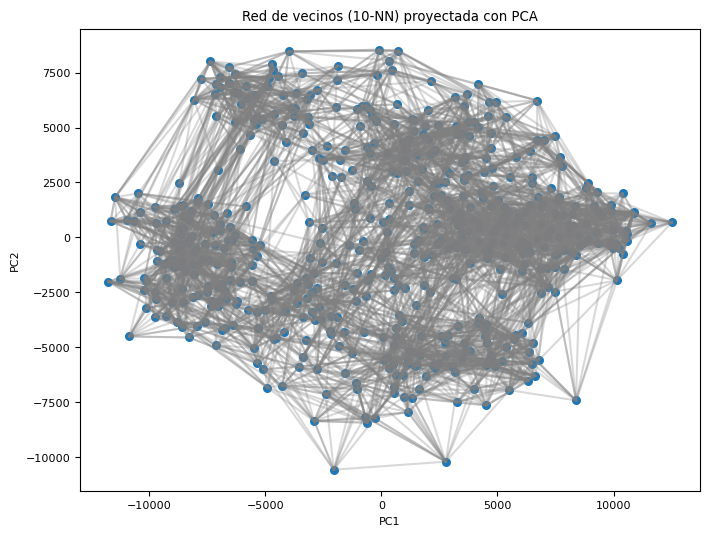

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import networkx as nx

# PCA dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_raw)

# Create k-nearest neighbors graph
knn_graph = kneighbors_graph(X_raw, n_neighbors=10, include_self=False)
graph = knn_graph.toarray()

# Visualize connections
plt.figure(figsize=(8, 6))
for i in range(len(X_pca)):
    for j in range(len(X_pca)):
        if graph[i, j]:
            plt.plot([X_pca[i, 0], X_pca[j, 0]],
                     [X_pca[i, 1], X_pca[j, 1]], color='gray', alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30)
plt.title("k-NN graph (10 neighbors) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


2. Density map (k closest neighbors)
You can visualize the local density (number of nearby neighbors) to detect natural groupings or regions with little connectivity.

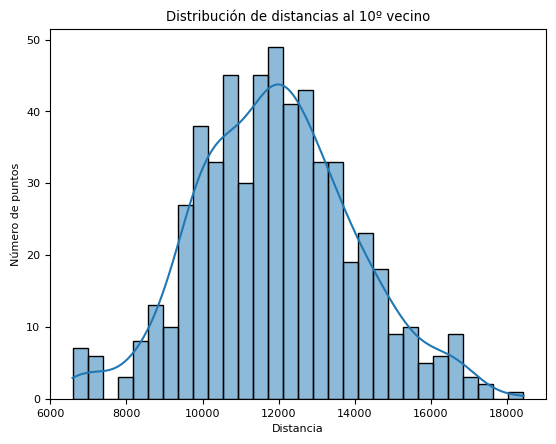

In [ ]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# Fit nearest neighbors with 10 neighbors
neighbors = NearestNeighbors(n_neighbors=10)
distances, _ = neighbors.fit(X_raw).kneighbors()

# Distance to the 10th neighbor
avg_distance = distances[:, -1]

# Plot distribution of distances
sns.histplot(avg_distance, bins=30, kde=True)
plt.title("Distribution of distances to the 10th neighbor")
plt.xlabel("Distance")
plt.ylabel("Number of points")
plt.show()


### Visualizations

As we have not achieved improvements in the results, we will choose to visualize the data in case it could detect any pattern not seen above. This might help us make use of the Connectivity hyperparameter of the treated hierarchical algorithm.

Visualization using PCA. \
We start doing PCA that makes a 2D data visualization, so it performs a reuse of dimensionality. The projection shown evidence that the data is overlapping and even some without a well -defined form. For now he would classify them as irregular

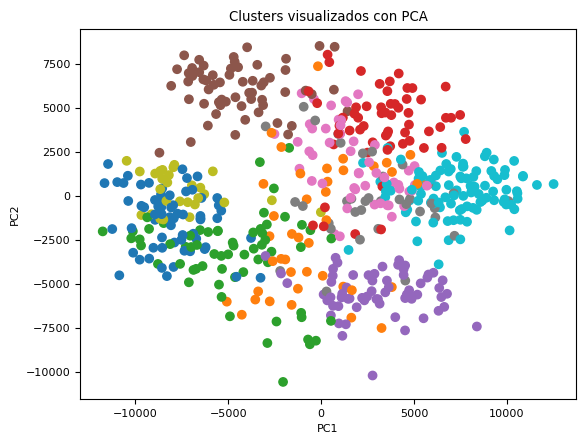

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_raw)

# Scatter plot with cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
plt.title("Clusters visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


We tried to trace elliptical contours around the clusters in case we do not see something with the naked eye. As we can see at the exit, there is a clear intersection between the ellipses generated. This difficulty the idea we had to use the connectivity hyperparameter of the Agraglomerative clustering algorithm.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_ellipses(X_2d, labels):
    for i in np.unique(labels):
        points = X_2d[labels == i]
        cov = np.cov(points, rowvar=False)
        mean = points.mean(axis=0)
        vals, vecs = np.linalg.eigh(cov)
        angle = np.degrees(np.arctan2(*vecs[:, 1][::-1]))
        width, height = 2 * np.sqrt(vals)
        ell = Ellipse(xy=mean, width=width, height=height, angle=angle, alpha=0.3)
        plt.gca().add_patch(ell)
        plt.scatter(points[:, 0], points[:, 1])
    plt.title("Approximate shape of the clusters")
    plt.show()


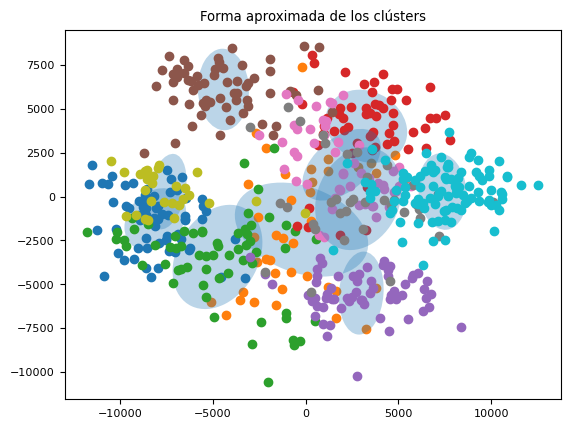

In [ ]:
from sklearn.datasets import make_blobs

# Call the function
plot_ellipses(X_pca, labels)


Visualization using T-Sne \
As the way obtained before is irregular, we have to look for a more appropriate visualization method, then we choose the T-Sne option. \
The reason is that it allows visualizing groups that are irregular as you are. Seeing the exit we can see as the clusters are more separate, but still insufficient. For example, orange, gray and brown are well separated although the rest still have too many intersections. \
Therefore, now we discard the option to improve the performance of the metrics using hyperparameters such as Connectivity.

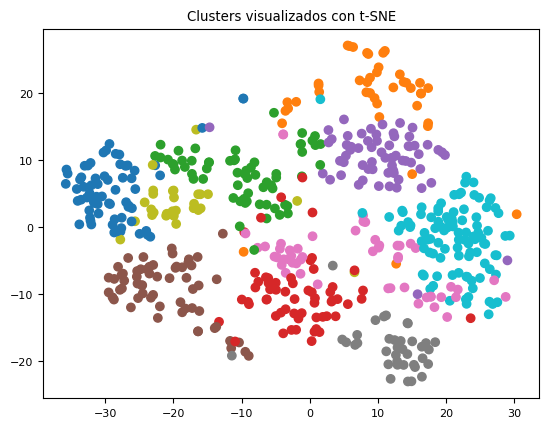

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_raw)

# Scatter plot with cluster labels
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("Clusters visualized with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


### 3.3 Data preprocessing

So far we have worked throughout the time without manipulating the data, now we are going to try to analyze the metrics eliminating the Dataset outliers. The chosen method is the iqr. 

In [ ]:
import numpy as np

# Create a copy of the original DataFrame
x_cleaned = x.copy()

# Apply the IQR method to remove outliers
for feature in x.columns:
    Q1 = np.percentile(x_cleaned[feature], 25)
    Q3 = np.percentile(x_cleaned[feature], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only values within the allowed range
    x_cleaned = x_cleaned[(x_cleaned[feature] >= lower_bound) & (x_cleaned[feature] <= upper_bound)]

# Show size before and after
print(f"Original size: {x.shape}")
print(f"Size after removing outliers: {x_cleaned.shape}")


Tamaño original: (569, 30)
Tamaño después de eliminar outliers: (85, 30)


Among the three algorithms we have discussed, Quiçen has given better results has been K-Means. Therefore, we will see if after the elimination of outliers we see some kind of improvement in internal evalaution metrics.

Of all the combinations I have been tested, it was the first with the hyperpartepartmers for defects with k = 2 that gave the best result. Now let's try if it is still better even cleaning the data. We show the columns of this case here to compare with the ones we are going to generate now.

```
n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
2           0.139109          90.048213                2.436702
3           0.120542          62.682132                2.615272
4           0.098021          55.448334                2.642940
5           0.090450          49.271755                2.700058
6           0.094568          44.028835                2.644120
7           0.080751          38.937546                2.745799
8           0.088063          38.784163                2.550244
9           0.080494          35.730307                2.489789
10          0.090149          34.723875                2.341687

```

The same block of code but using x_chlened instead of x.

Conclusions: \
Metric Silhouette_Score \
This metric has improved in almost all $k\geq 3$ after eliminating the outliers. The reason is because the outliers force the biggest clusters than they should, so they are now more compact and there is greater Seprication between them. This is ideal for this metric, hence its best performance.

Metric calinski_harabasz_score \
This metric without an enmbargo worsens. This is because Chi is use quadratic variances and weighs the dispersion between the centroids. If eliminating outliers then the dispersion decreases and therefore also the performance of CH.Davies_Bouldin_Score \ metric
Like Silhouette, it gives good results for compact and separate clusters. For this reason it also improves your performance.


We can affirm that the elimination of outliers has been a success for the improvement of clusterings algortimos.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Use the data without scaling and after removing outliers
X_raw = x_cleaned.copy()

# Loop to calculate clustering metrics on raw data
raw_results = {
    "n_clusters": [],
    "silhouette_score": [],
    "calinski_harabasz_score": [],
    "davies_bouldin_score": []
}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_raw)

    sil_score = silhouette_score(X_raw, labels)
    ch_score = calinski_harabasz_score(X_raw, labels)
    db_score = davies_bouldin_score(X_raw, labels)

    raw_results["n_clusters"].append(k)
    raw_results["silhouette_score"].append(sil_score)
    raw_results["calinski_harabasz_score"].append(ch_score)
    raw_results["davies_bouldin_score"].append(db_score)

raw_results_df = pd.DataFrame(raw_results)

# Display the results
print(raw_results_df)


   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0           2          0.131110                12.356225              2.450402
1           3          0.170721                14.867244              2.055983
2           4          0.137527                14.017678              2.067313
3           5          0.151171                13.783231              1.947576
4           6          0.120009                12.176451              1.871358
5           7          0.130165                10.924228              1.817980
6           8          0.111484                 9.684164              1.919779
7           9          0.126824                 9.921235              1.815853
8          10          0.147640                 9.875038              1.689927


c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ricardo\anaconda3\envs\AAII\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

To see in a simpler way everything described, we make a graph showing the values ​​of the metrics for the two cases, with and without outliers, based on the value value k.

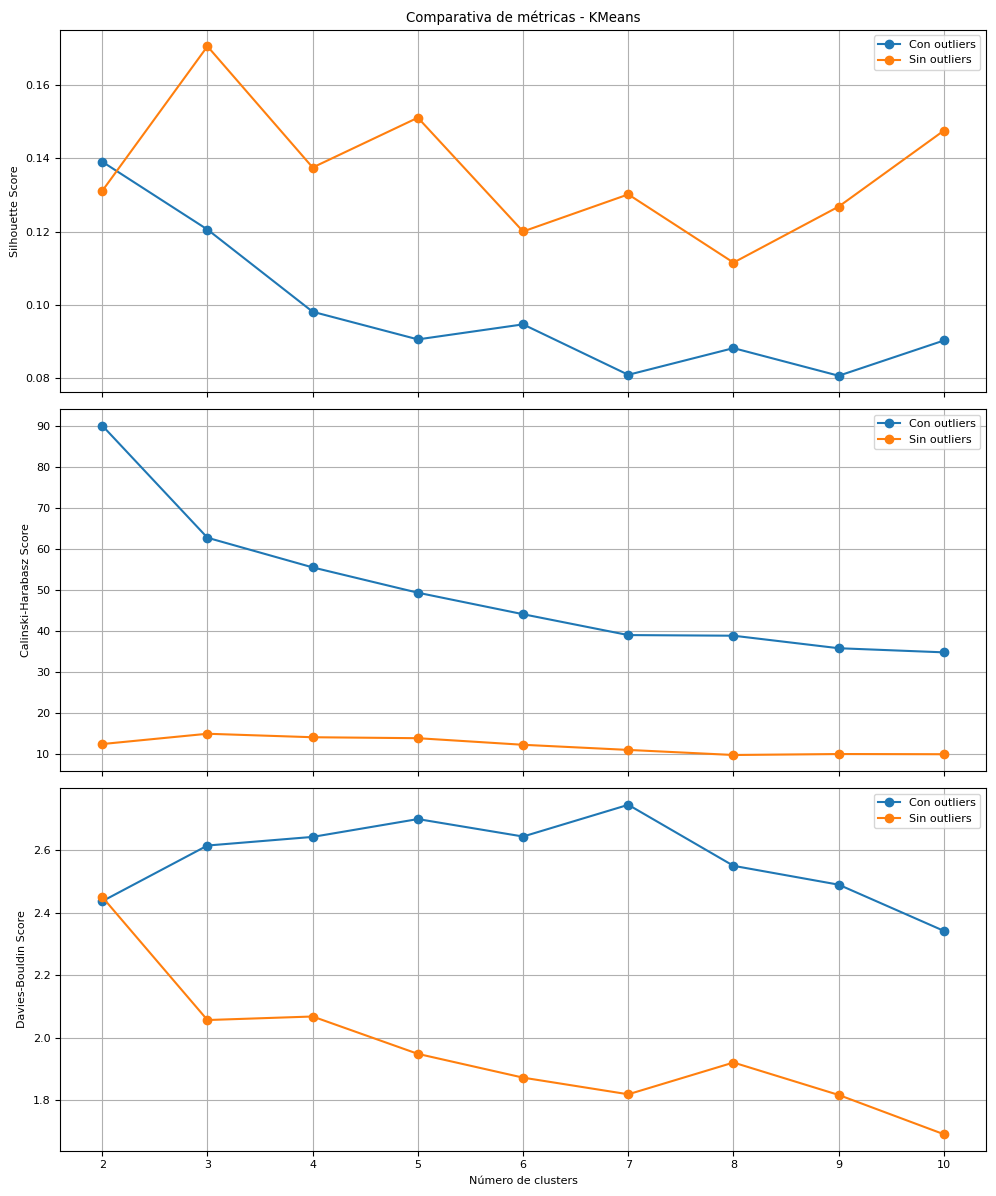

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrames con los datos
sin_outliers = pd.DataFrame({
    'n_clusters': list(range(2, 11)),
    'silhouette_score': [0.131110, 0.170721, 0.137527, 0.151171, 0.120009, 0.130165, 0.111484, 0.126824, 0.147640],
    'calinski_harabasz_score': [12.356225, 14.867244, 14.017678, 13.783231, 12.176451, 10.924228, 9.684164, 9.921235, 9.875038],
    'davies_bouldin_score': [2.450402, 2.055983, 2.067313, 1.947576, 1.871358, 1.817980, 1.919779, 1.815853, 1.689927]
})

con_outliers = pd.DataFrame({
    'n_clusters': list(range(2, 11)),
    'silhouette_score': [0.139109, 0.120542, 0.098021, 0.090450, 0.094568, 0.080751, 0.088063, 0.080494, 0.090149],
    'calinski_harabasz_score': [90.048213, 62.682132, 55.448334, 49.271755, 44.028835, 38.937546, 38.784163, 35.730307, 34.723875],
    'davies_bouldin_score': [2.436702, 2.615272, 2.642940, 2.700058, 2.644120, 2.745799, 2.550244, 2.489789, 2.341687]
})

# Graficar
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Silhouette Score
axs[0].plot(con_outliers['n_clusters'], con_outliers['silhouette_score'], label='Con outliers', marker='o')
axs[0].plot(sin_outliers['n_clusters'], sin_outliers['silhouette_score'], label='Sin outliers', marker='o')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Comparativa de métricas - KMeans')
axs[0].legend()
axs[0].grid(True)

# Calinski-Harabasz Score
axs[1].plot(con_outliers['n_clusters'], con_outliers['calinski_harabasz_score'], label='Con outliers', marker='o')
axs[1].plot(sin_outliers['n_clusters'], sin_outliers['calinski_harabasz_score'], label='Sin outliers', marker='o')
axs[1].set_ylabel('Calinski-Harabasz Score')
axs[1].legend()
axs[1].grid(True)

# Davies-Bouldin Score
axs[2].plot(con_outliers['n_clusters'], con_outliers['davies_bouldin_score'], label='Con outliers', marker='o')
axs[2].plot(sin_outliers['n_clusters'], sin_outliers['davies_bouldin_score'], label='Sin outliers', marker='o')
axs[2].set_ylabel('Davies-Bouldin Score')
axs[2].set_xlabel('Número de clusters')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


## 4 Conclusions

Among the three clustering algorithms, the best performance has been K-Means. One of the reasons is that the data were usually concentrated, then the clusters that appeared were convex and ellipsoidal. \
By eliminating the outliers that cause the Centroids of the Clusters to move too much, there was hardly any intersection between them further improving the algorimo K-Means. 

If the dataset had had more than two classes in the Target variable (m or n), the results would probably have been better, closer, for example, to the maximum value 1 of Silhouette and not the low ones appeared as 0.17.Finally, to comment that in my opinion the metric that has worked best has been Silhouette Score since this metric excatiously evaluates what K-Means tries to optimize: Data compaction and the village between Cluster.